

# Project: Investigate a Dataset (No-show appointments)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I investigated a dataset of No-show appoinments records for Brasil public hospitals.
This dataset collects information from 100k medical appointments in Brazil and is focused on the    question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## convert columns names to lower case

In [3]:
df.columns = df.columns.str.lower()
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.rename(columns = {'no-show' : 'no_show'},inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## check Datatypes

In [5]:
df.dtypes

patientid         float64
appointmentid       int64
gender             object
scheduledday       object
appointmentday     object
age                 int64
neighbourhood      object
scholarship         int64
hipertension        int64
diabetes            int64
alcoholism          int64
handcap             int64
sms_received        int64
no_show            object
dtype: object

## convert datatypes of some columns and check datatypes again

In [6]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df.patientid = df.patientid.astype(str)
df.dtypes

patientid                      object
appointmentid                   int64
gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no_show                        object
dtype: object

## count null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  object             
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hipertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handcap         110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no_show       

> **The dataset does not contain any null value**

## count duplicates

In [8]:
df.duplicated().sum()

0

> **No duplicates found**

# lets get some statistics about the dataset

In [9]:
df.describe()

,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **we notice that** the minimum age is -1 and it not legal
                     so we have to drop all ages less than zero

In [10]:
df.drop(df[df.age < 0].index,inplace=True)

> **the second notice** that the maximum value of handcap is 4 so we should adjust all values above 1 to 1

In [11]:
df[df['handcap'] > 1] = 1

# **Now the dataset is ready to be explored**

<a id='eda'></a>
## Exploratory Data Analysis

### Q1 Does gender affect on the results of our analysis?

In [12]:
males_df = df[df.gender == 'M']
males_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
11,7542951368435.0,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
13,911394617215919.0,5636249,M,2016-04-28 14:52:07+00:00,2016-04-29 00:00:00+00:00,28,NOVA PALESTINA,0,0,0,0,0,0,No
16,84574392942817.0,5633121,M,2016-04-28 08:51:47+00:00,2016-04-29 00:00:00+00:00,50,NOVA PALESTINA,0,0,0,0,0,0,No
22,863229818887631.0,5616091,M,2016-04-25 13:29:16+00:00,2016-04-29 00:00:00+00:00,13,CONQUISTA,0,0,0,0,0,1,Yes


In [13]:
females_df = df[df.gender == 'F']
females_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274.0,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No


In [14]:
males_df.mean()

appointmentid    5.677100e+06
age              3.370635e+01
scholarship      5.189523e-02
hipertension     1.664896e-01
diabetes         6.010830e-02
alcoholism       5.515973e-02
handcap          2.230743e-02
sms_received     2.916807e-01
dtype: float64

In [15]:
females_df.mean()

appointmentid    5.674328e+06
age              3.888110e+01
scholarship      1.232399e-01
hipertension     2.131605e-01
diabetes         7.779172e-02
alcoholism       1.705005e-02
handcap          1.646452e-02
sms_received     3.370556e-01
dtype: float64

> - Males and Females are almost equal at:
        - age
        - hipertension
> - Females are slightly higher at:
        - diabetes
        - sms_received
> - Males are slightly higher at:
        - handcap
> Males are much higher at:
        - scholarship
        - alcoholism

### Q2 what is the percentage of patients who missed their appointment?

In [16]:
miss_percent = df[df['no_show'] == 'Yes'].shape[0] / df.shape[0]
print('%d %% of patients missed their appointments' %(miss_percent * 100) )

20 % of patients missed their appointments


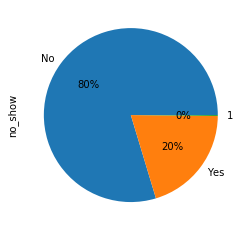

In [17]:
df.no_show.value_counts().plot.pie(autopct='%1.0f%%')

## Q3 what is the distribution of patients ages?

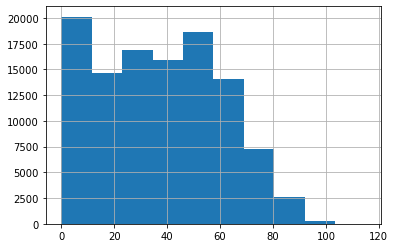

In [18]:
df.age.hist()

> the histogram shows that most of the patients under 60 years

## Q4 what is the percentage of patients who do not suffer from any chronic disease?

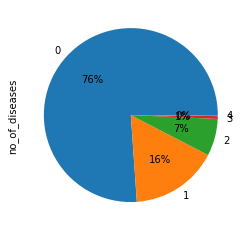

In [19]:
df['no_of_diseases'] = df['diabetes'] + df['handcap'] + df['hipertension'] + df['alcoholism']
df.no_of_diseases.value_counts().plot.pie(autopct='%1.0f%%')

> from the pie chart 76% of patients do not suffer from chronic disease

<a id='conclusions'></a>
## Conclusions of the questions

> - Males and Females are almost equal at:
        - age
        - hipertension
> - Females are slightly higher at:
        - diabetes
        - sms_received
> - Males are slightly higher at:
        - handcap
> Males are much higher at:
        - scholarship
        - alcoholism
 

> 20 % of patients missed their appointments

> most of the patients under 60 years

> 76% of patients do not suffer from chronic disease